# Plot means

In [1]:
#!/usr/bin/env python                                                                                                                       

# Add any possible locations of amr-wind-frontend here                                                                                      
amrwindfedirs = ['../',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)

# Important header information                                                                                                              
#import postprolib as pp

# Load the libraries                                                                                                                        
#import postproamrwindsample as ppsample
import numpy             as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
#import xarray as xr
#import argparse
import pickle

# Make all plots inline 
%matplotlib inline

In [2]:
def loadPickle(picklefname):
    pfile = open(picklefname, 'rb')
    db   = pickle.load(pfile)
    x    = db['x']
    y    = db['y']
    z    = db['z']
    vx   = db['vx']
    vy   = db['vy']
    vz   = db['vz']
    time = db['time']
    pfile.close()
    return x, y, z, vx, vy, vz, time

def avgfield(v, mintime, maxtime):
    avgv = None
    iavg = 0
    for itime, vfield in v.items():
        if (mintime<=itime) and (itime<=maxtime):
            iavg += 1
            if avgv is None:
                avgv = vfield
            else:
                avgv += vfield
    #print(iavg)
    return avgv/float(iavg)

def setfigtextsize(ax, fsize):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label, ax.yaxis.get_offset_text()] + ax.get_xticklabels() + ax.get_yticklabels() ):
        item.set_fontsize(fsize)

In [3]:
tavg1 = 300
tavg2 = 1000

farmlist = [{'title':'AWAKEN domain',
             'noturb':'means/farm_z90_mean_noturb.pkl',
             'wturb':'means/farm_z90_mean_wturb.pkl'},
            {'title':'King Plains',
             'noturb':'means/KP_z90_mean_noturb.pkl',
             'wturb':'means/KP_z90_mean_wturb.pkl'},
            {'title':'Thunder Ranch',
             'noturb':'means/TR_z90_mean_noturb.pkl',
             'wturb':'means/TR_z90_mean_wturb.pkl'},
            {'title':'Armadillo Flats',
             'noturb':'means/AF_z80_mean_noturb.pkl',
             'wturb':'means/AF_z80_mean_wturb.pkl'},
            {'title':'Chisholm View',
             'noturb':'means/CV_z80_mean_noturb.pkl',
             'wturb':'means/CV_z80_mean_wturb.pkl'},
            {'title':'Breckinridge',
             'noturb':'means/BR_z80_mean_noturb.pkl',
             'wturb':'means/BR_z80_mean_wturb.pkl'},
          ]

Loading farm AWAKEN domain
Loading farm King Plains
Loading farm Thunder Ranch
Loading farm Armadillo Flats
Loading farm Chisholm View
Loading farm Breckinridge


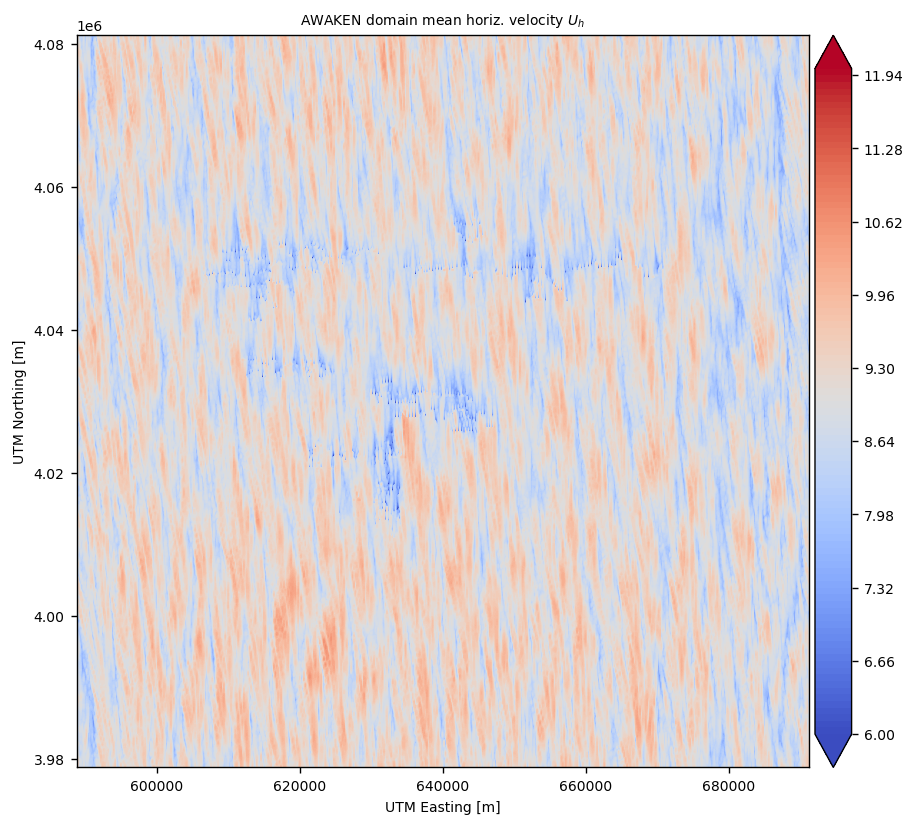

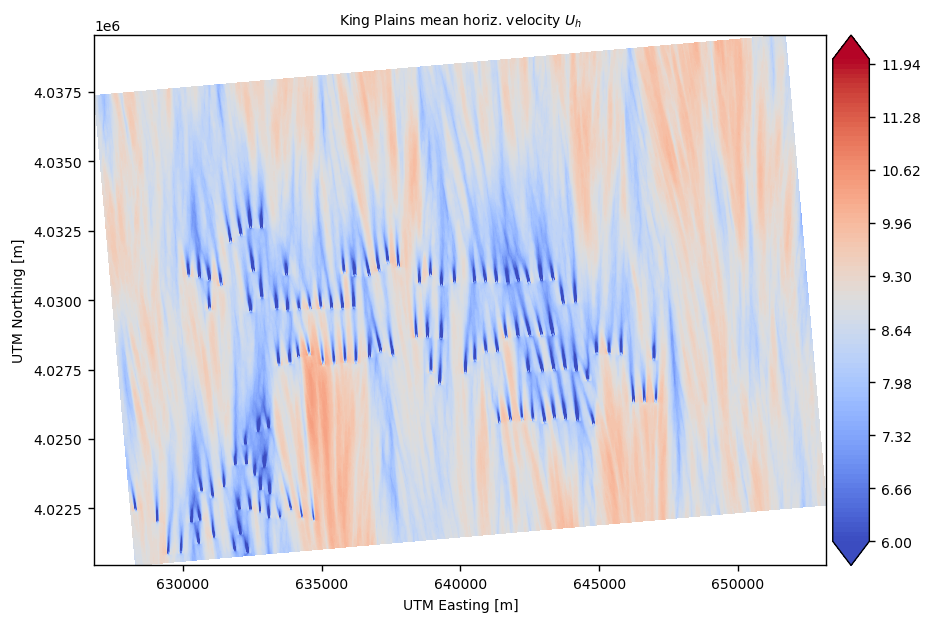

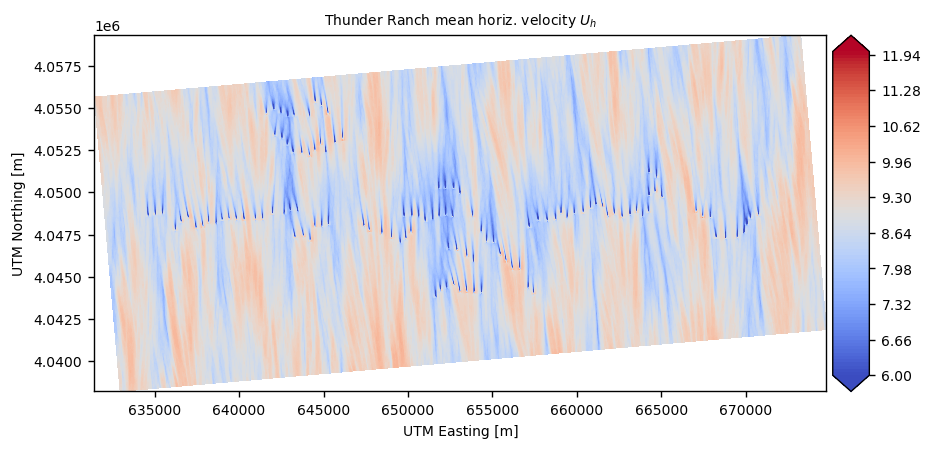

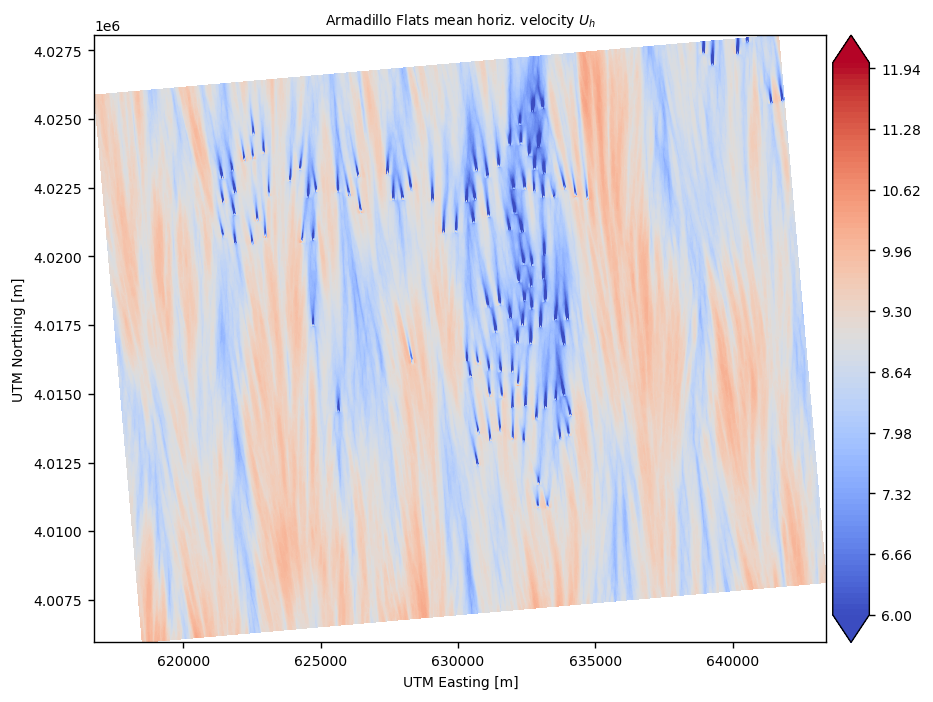

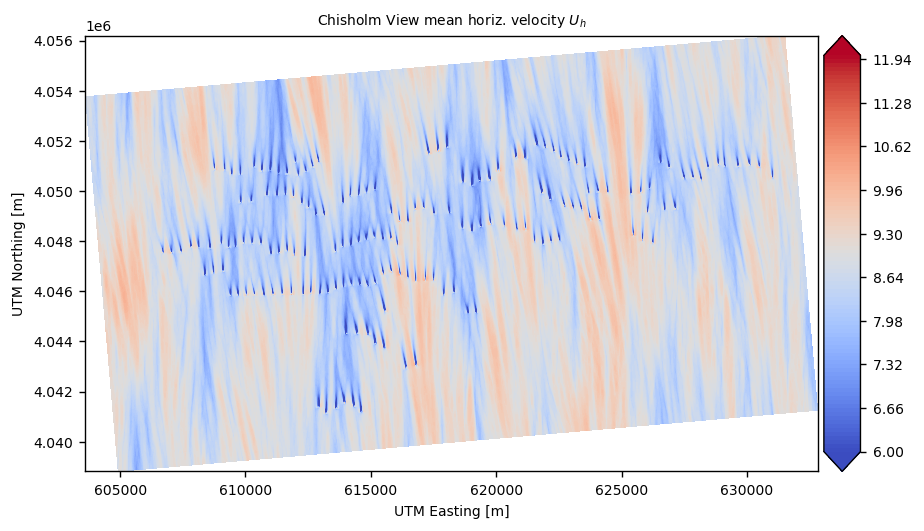

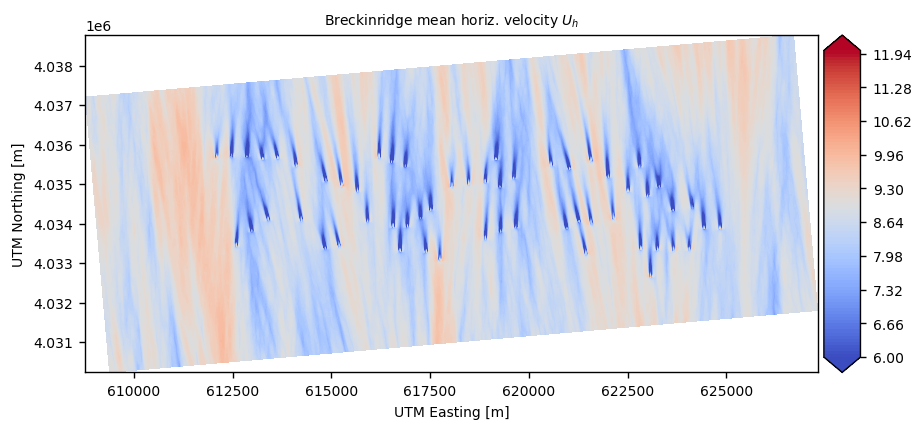

In [4]:
for farm in farmlist:
    print('Loading farm '+farm['title'])
    x, y, z, vx, vy, vz, time = loadPickle(farm['wturb'])
    vx_avg_wt = avgfield(vx, tavg1, tavg2)
    vy_avg_wt = avgfield(vy, tavg1, tavg2)
    
    # plot the with turbine mean flow case
    meanlevels = np.linspace(6,12,101)
    fig, ax = plt.subplots(1,1,figsize=(8,8), dpi=125)
    vh = np.sqrt(vx_avg_wt**2 + vy_avg_wt**2)
    c=ax.contourf(x, y, vh[0,:,:], levels=meanlevels, cmap='coolwarm', extend='both')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar=fig.colorbar(c, ax=ax, cax=cax)
    ax.set_title(farm['title']+' mean horiz. velocity $U_h$')
    cbar.ax.tick_params(labelsize=8)
    ax.set_aspect('equal')
    ax.set_xlabel('UTM Easting [m]')
    ax.set_ylabel('UTM Northing [m]')
    setfigtextsize(ax, 8)
    

Loading farm AWAKEN domain


/tmp/ipykernel_1436332/754557765.py:14: RuntimeWarning: invalid value encountered in true_divide
  plotvar = (vh_wt[0,:,:])/vh_nt[0,:,:]; levels=np.linspace(0.95,1.05,101)


Loading farm King Plains
Loading farm Thunder Ranch
Loading farm Armadillo Flats
Loading farm Chisholm View
Loading farm Breckinridge


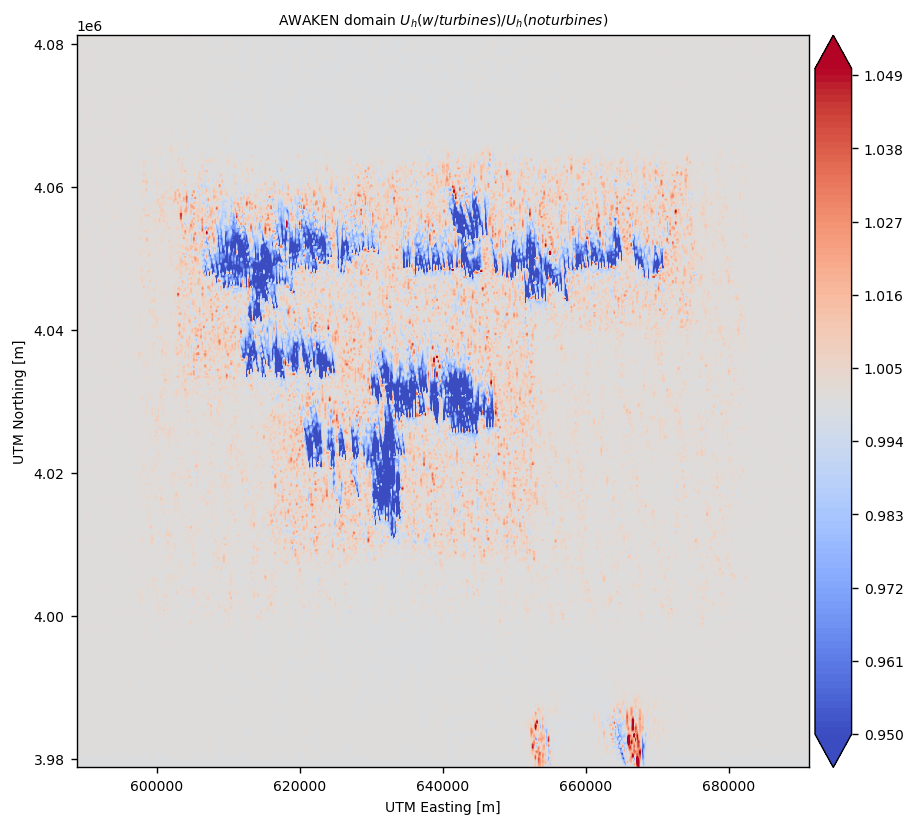

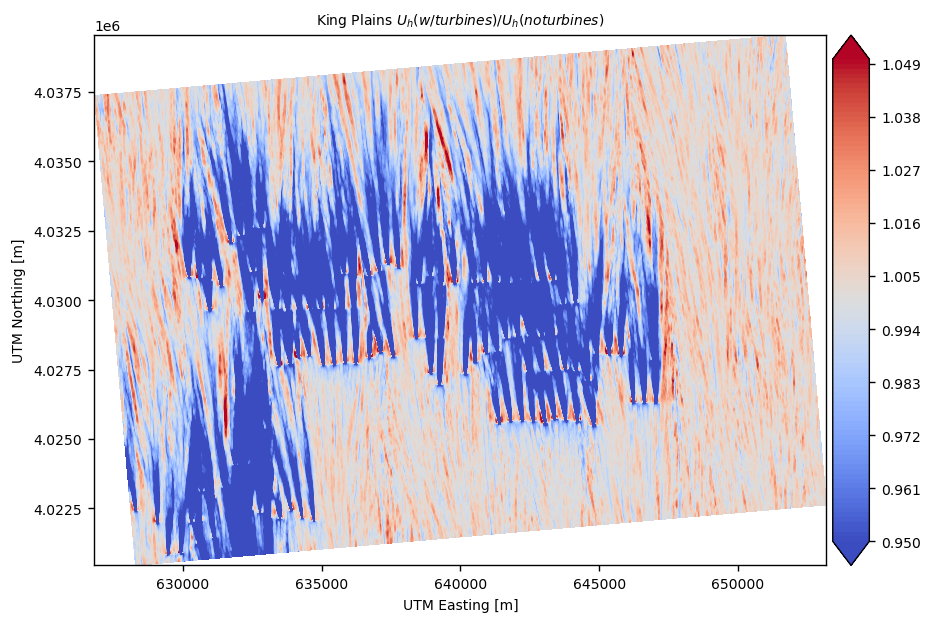

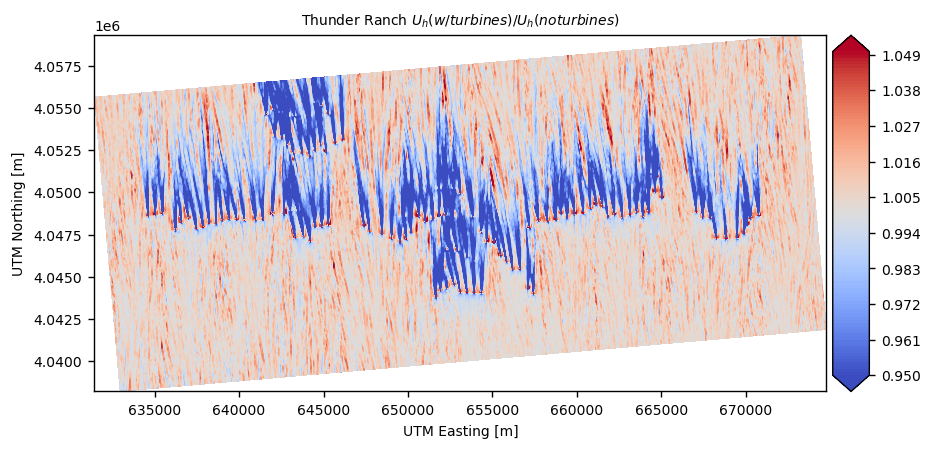

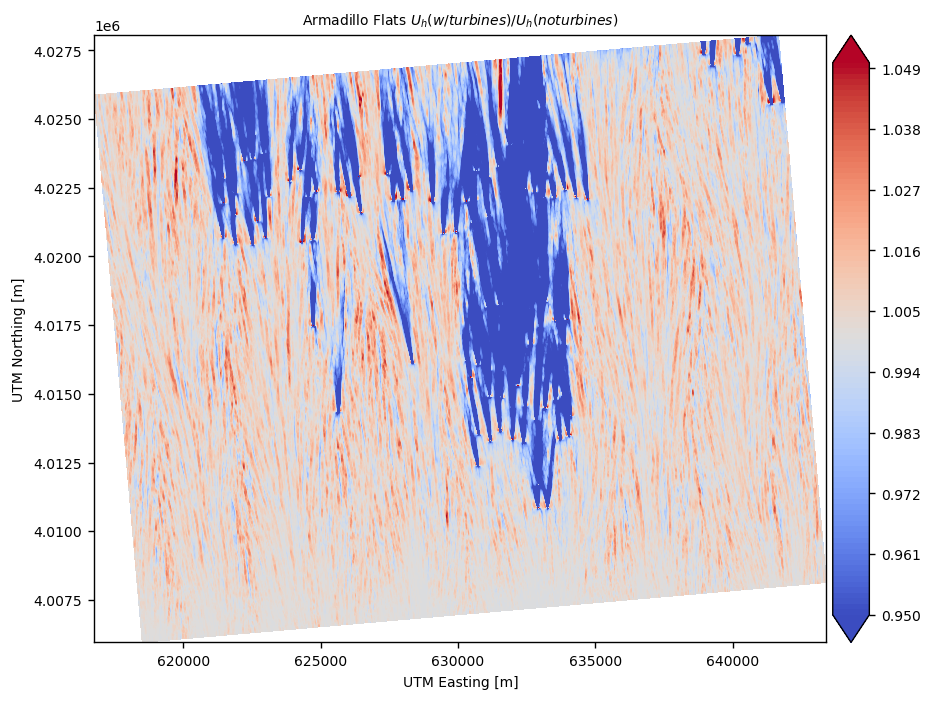

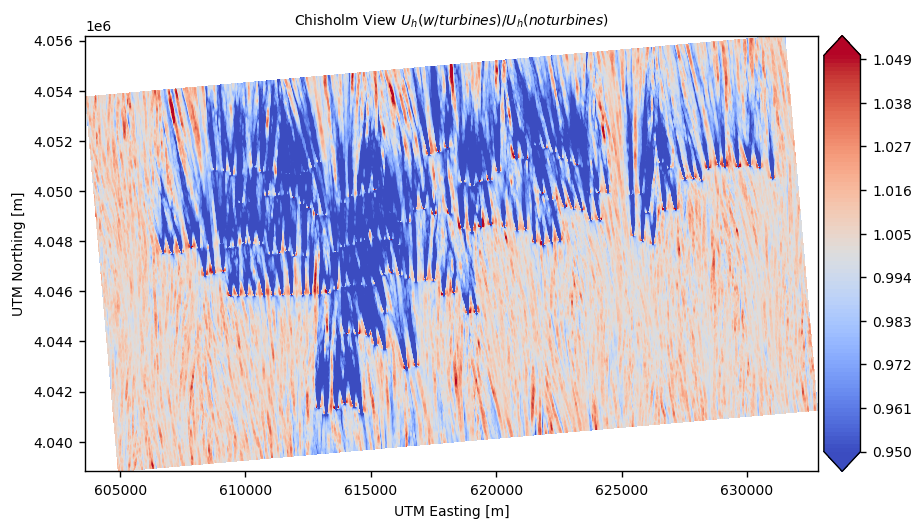

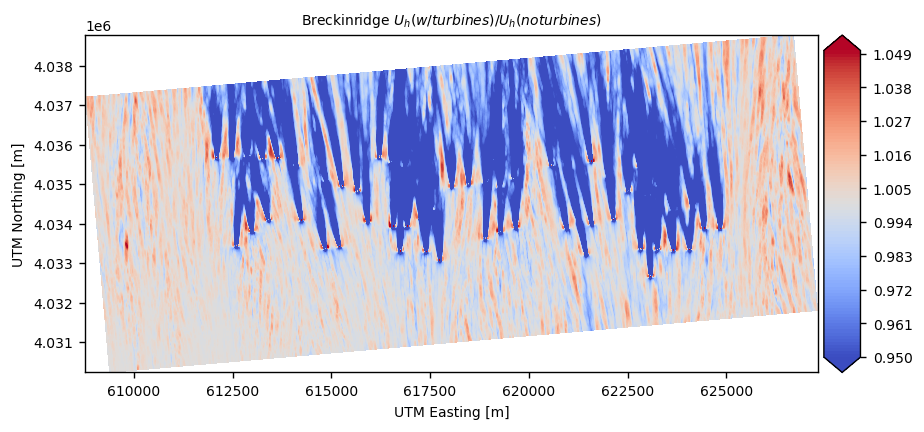

In [5]:
for farm in farmlist:
    print('Loading farm '+farm['title'])
    x, y, z, vx, vy, vz, time = loadPickle(farm['wturb'])
    vx_avg_wt = avgfield(vx, tavg1, tavg2)
    vy_avg_wt = avgfield(vy, tavg1, tavg2)
    x, y, z, vx, vy, vz, time = loadPickle(farm['noturb'])
    vx_avg_nt = avgfield(vx, tavg1, tavg2)
    vy_avg_nt = avgfield(vy, tavg1, tavg2)
    
    # Plot the blockage case
    fig, ax = plt.subplots(1,1,figsize=(8,8), dpi=125)
    vh_wt = np.sqrt(vx_avg_wt**2 + vy_avg_wt**2)
    vh_nt = np.sqrt(vx_avg_nt**2 + vy_avg_nt**2)
    plotvar = (vh_wt[0,:,:])/vh_nt[0,:,:]; levels=np.linspace(0.95,1.05,101)
    #plotvar = (vh_wt[0,:,:]-vh_nt[0,:,:]); levels=np.linspace(-1,1,101)
    
    c=ax.contourf(x, y, plotvar, levels=levels, cmap='coolwarm', extend='both')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar=fig.colorbar(c, ax=ax, cax=cax)
    ax.set_title(farm['title']+' $U_h(w/turbines)/U_h(no turbines)$')
    cbar.ax.tick_params(labelsize=8)
    ax.set_aspect('equal')
    ax.set_xlabel('UTM Easting [m]')
    ax.set_ylabel('UTM Northing [m]')
    setfigtextsize(ax, 8)